# Learning rate case study

- Playing with different learning rates
- Learning rate schedules
- Momentum 

In [9]:
import numpy as np
from sklearn.datasets import make_blobs
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import utils as ut
import pandas as pd
from keras.optimizers import SGD

## Effect of learning rate on a fixed network

In [15]:
def evaluate_model(n_input, n_classes, trainX, trainy, testX, testy, learning_rate):

    # define model
    model = tf.keras.Sequential()
    model.add(layers.Dense(50, activation='relu', name='layer-0', input_shape=(n_input,)))
    model.add(layers.Dense(n_classes, activation='softmax', name='layer-1'))
    
    # compile model
    opt = SGD(learning_rate=learning_rate)
    model.compile(optimizer=opt, loss = 'categorical_crossentropy', metrics=['accuracy'])
    
    # fit model
    history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)     
    return history

In [16]:
trainX, trainy, testX, testy = ut.create_dataset(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
n_input, n_classes = trainX.shape[1], testy.shape[1]

[1.0, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07]


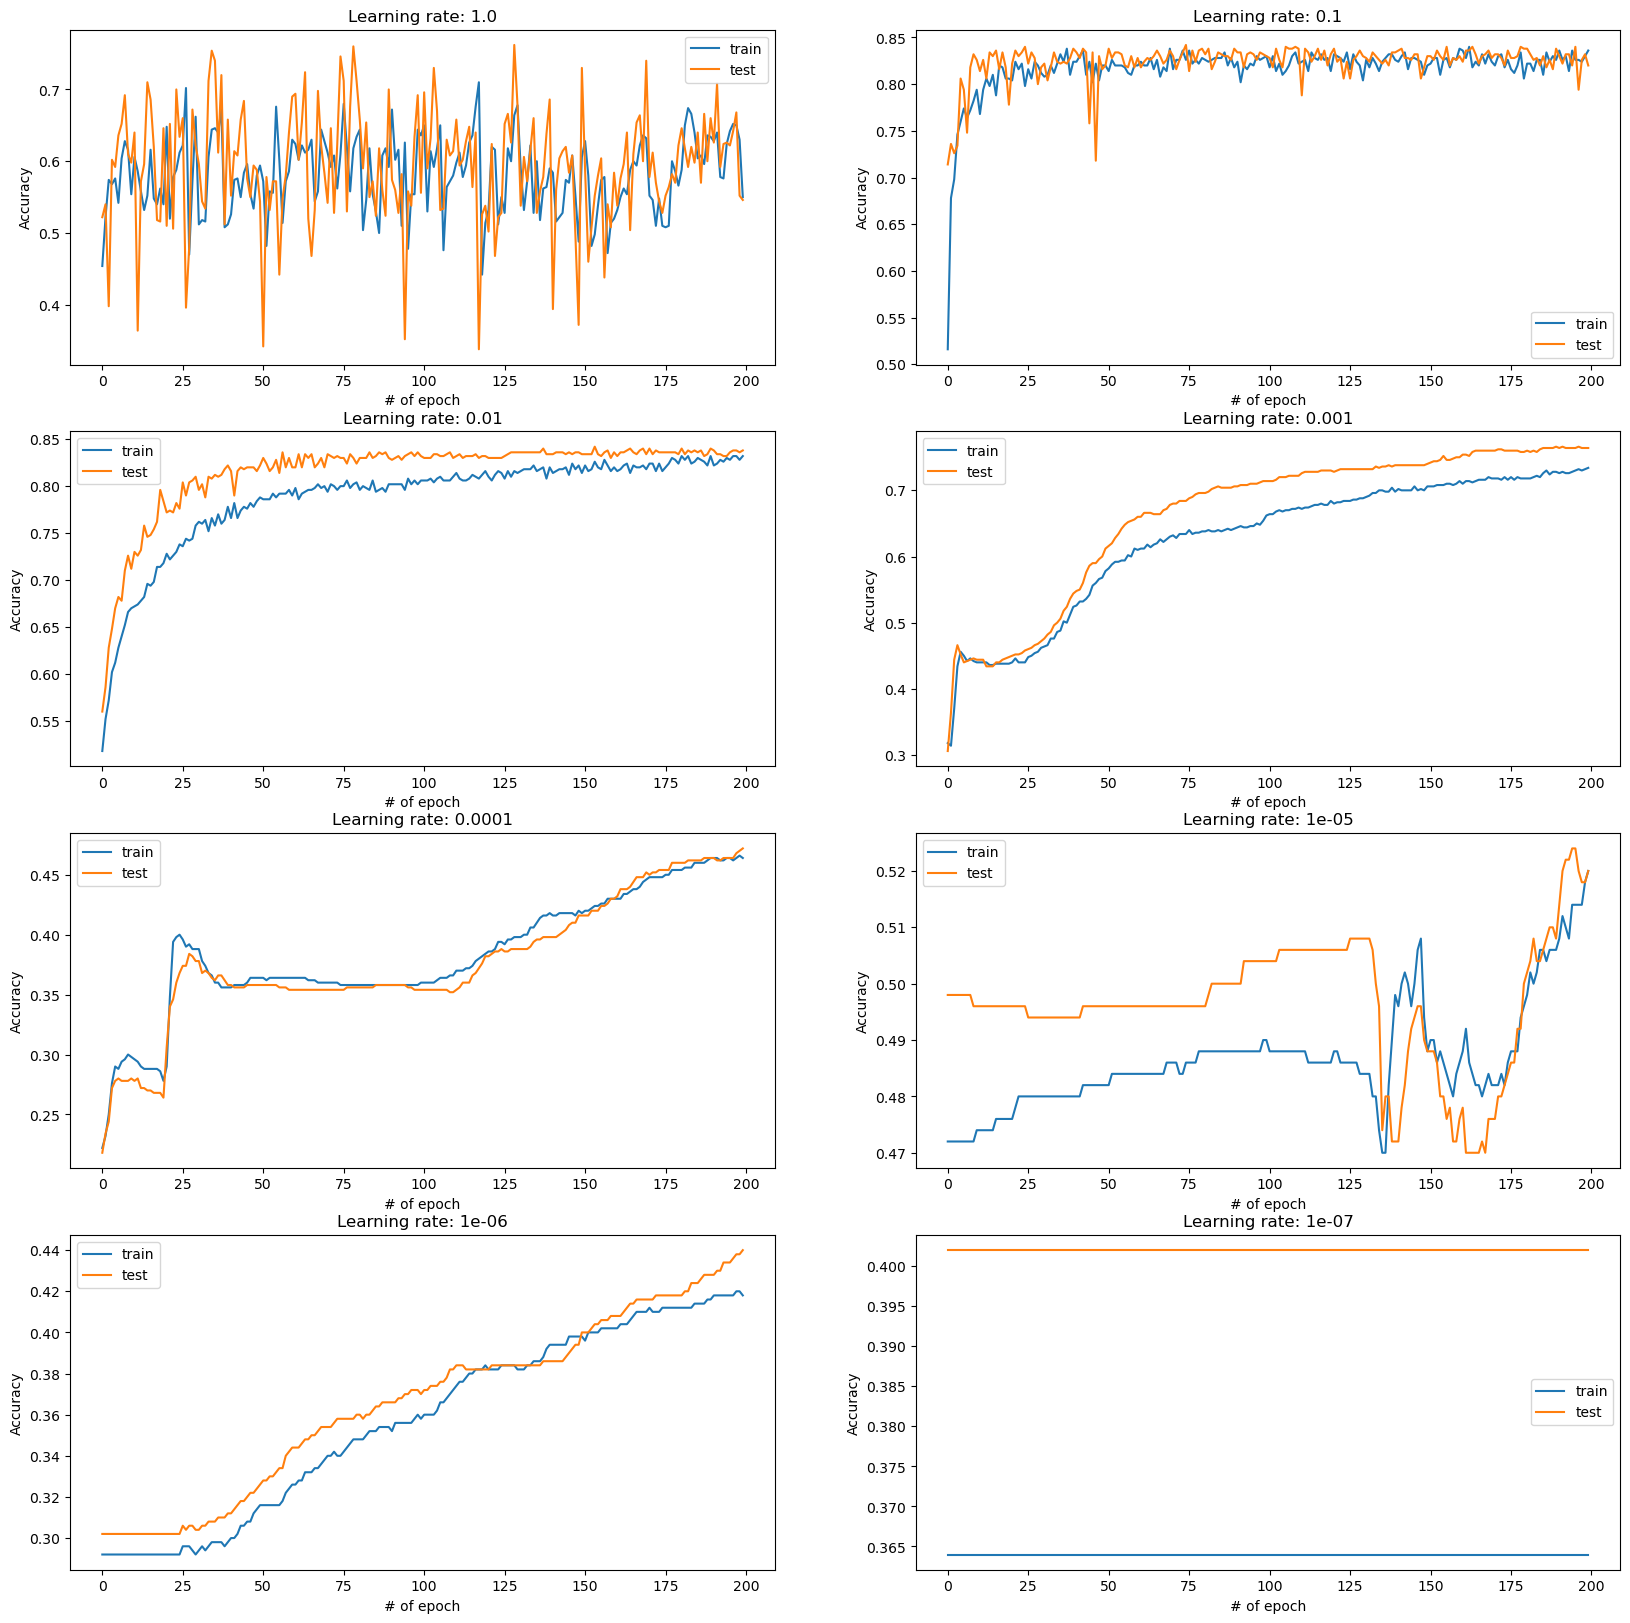

In [18]:
# plot learning curves
learning_rate_arr = [1e-0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]
print(learning_rate_arr)

plt.figure(figsize=(20,20))
i = 0
for learning_rate in learning_rate_arr:
  history = evaluate_model(n_input, n_classes, trainX, trainy, testX, testy, learning_rate)
  plot_no = 420 + (i+1)
  plt.subplot(plot_no)
  plt.plot(history.history['accuracy'], label='train')
  plt.xlabel('# of epoch')
  plt.ylabel('Accuracy')
  plt.title(f'Learning rate: {learning_rate}')
  plt.legend()

  plt.plot(history.history['val_accuracy'], label='test')
  plt.xlabel('# of epoch')
  plt.ylabel('Accuracy')
  plt.title(f'Learning rate: {learning_rate}')
  plt.legend()
  i = i+1


plt.show()

## Observations
- very high learning rate (1.0): accuracy is fluctuating, not inncreasing/decreasing trend. 
- high learning rate: noisy, fast learning 
- as learning rate lower: learning is very slow
- flattens at e-07, no learning 

[1.0, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07]


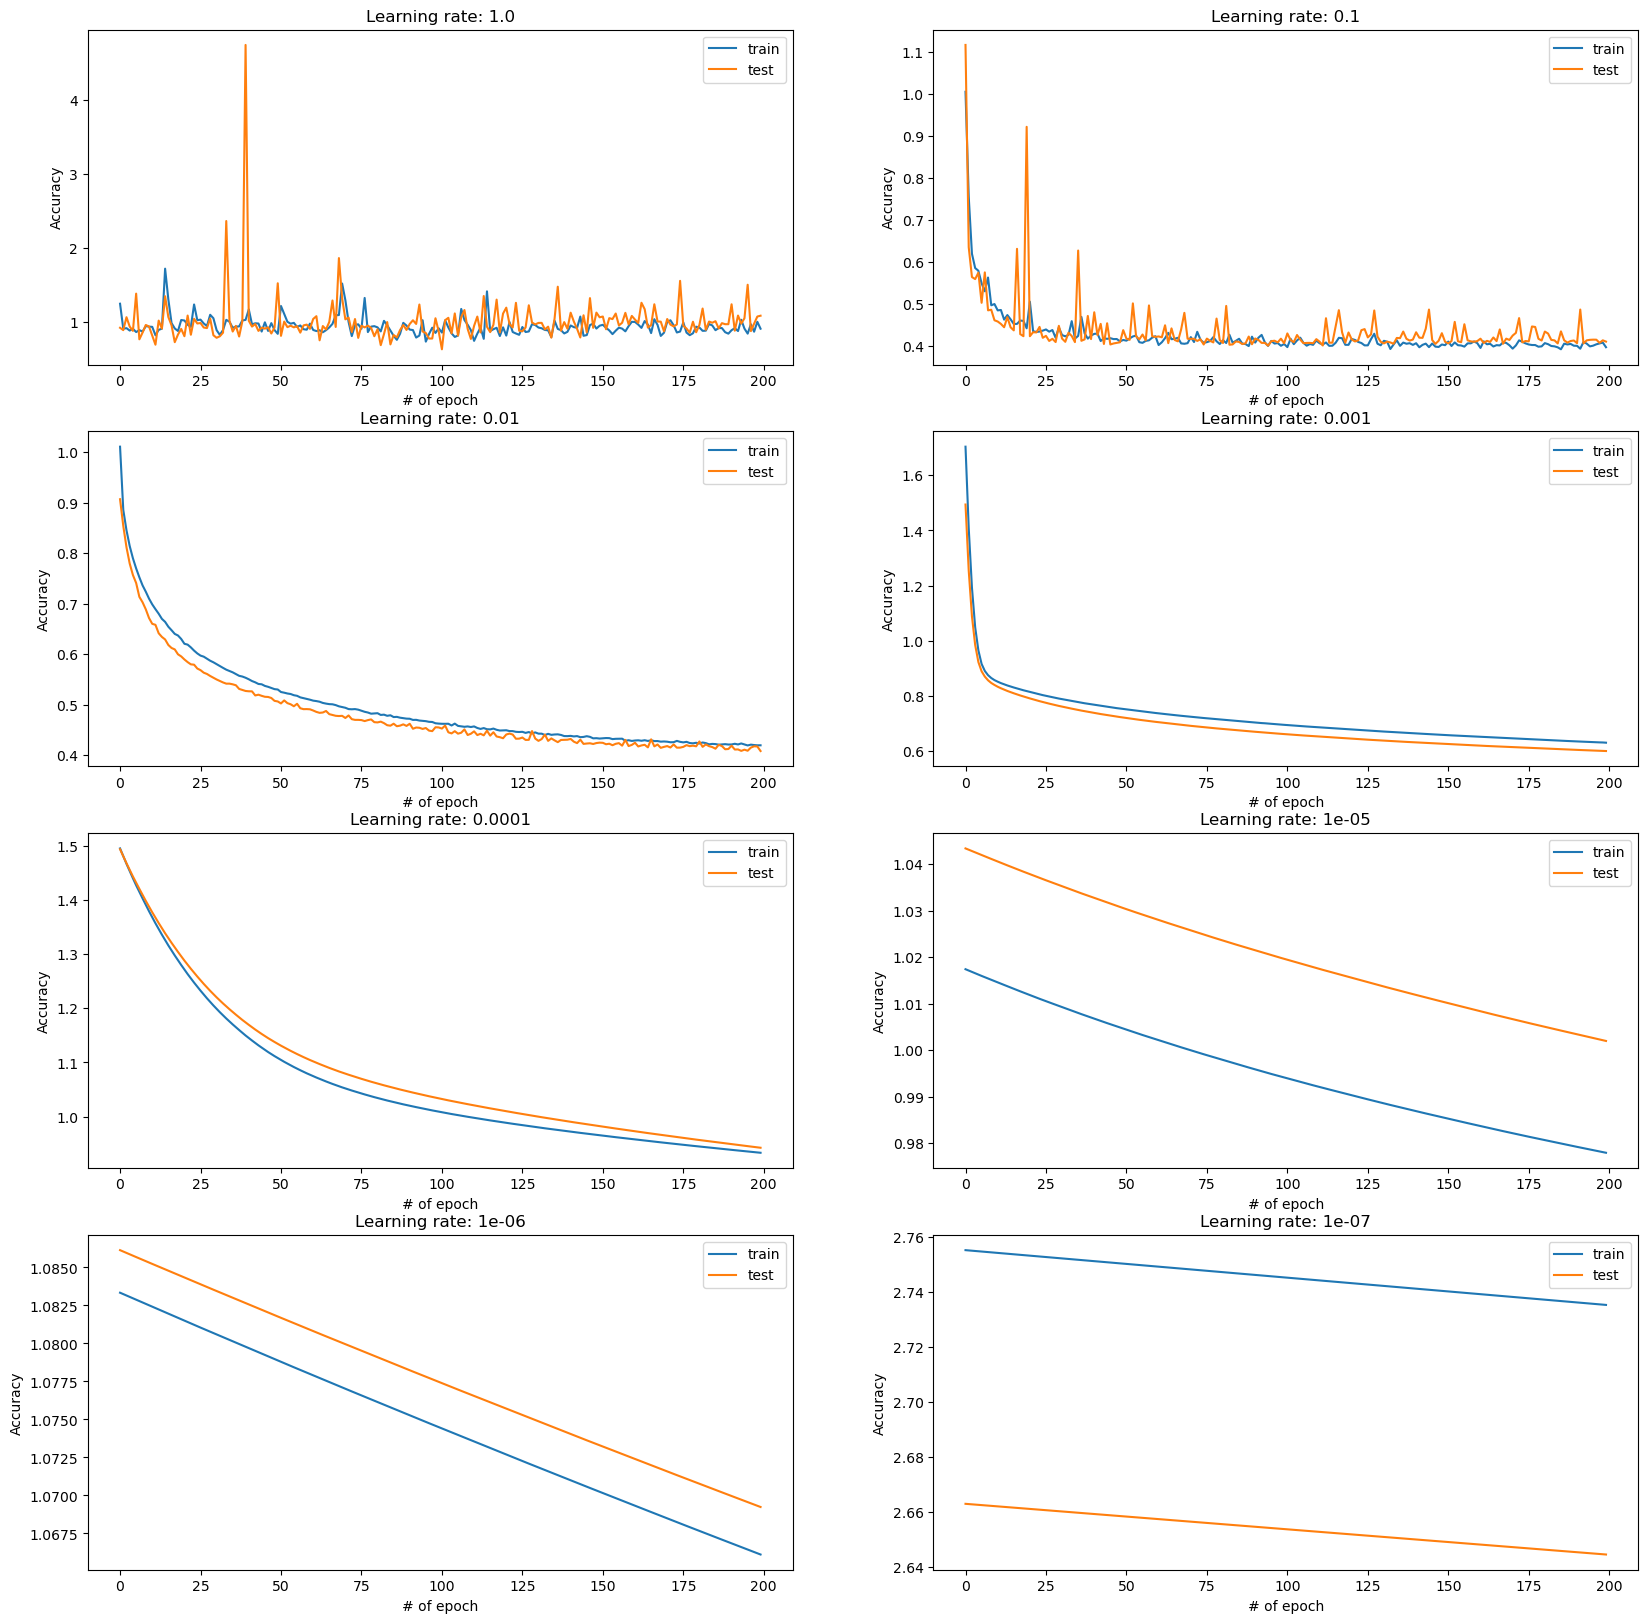

In [19]:
# plot learning curves
learning_rate_arr = [1e-0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]
print(learning_rate_arr)

plt.figure(figsize=(20,20))
i = 0
for learning_rate in learning_rate_arr:
  history = evaluate_model(n_input, n_classes, trainX, trainy, testX, testy, learning_rate)
  plot_no = 420 + (i+1)
  plt.subplot(plot_no)
  plt.plot(history.history['loss'], label='train')
  plt.xlabel('# of epoch')
  plt.ylabel('Accuracy')
  plt.title(f'Learning rate: {learning_rate}')
  plt.legend()

  plt.plot(history.history['val_loss'], label='test')
  plt.xlabel('# of epoch')
  plt.ylabel('Accuracy')
  plt.title(f'Learning rate: {learning_rate}')
  plt.legend()
  i = i+1


plt.show()